# PCA-testing

### Testing which variables explain the variance the most for an other variable - popularity is excluded.

In [1]:
#import pystan
#import pystan_utils
import pandas as pd
from pandas import *
from pylab import *
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import interactive
%matplotlib inline
import spotipy
import random
import math


#### Loading the data from 2017, 2018 and 2019

In [2]:
data1 = pd.read_csv("SpotifyAudioFeatures2017.csv")
data2 = pd.read_csv("SpotifyAudioFeatures2018.csv")
data3 = pd.read_csv("SpotifyAudioFeatures2019.csv")

df_tracks = pd.concat([data1, data2,data3])
df_tracks.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,Loud Luxury,Body (feat. brando),7K7MUBCnzgBAvMVW2RTWNs,69,0.0476,0.752,163216,0.764,0.000094,1,0.0543,-4.399,1,0.0380,121.958,4,0.582
1,1,XXXTENTACION,Jocelyn Flores,7m9OqQk4RVRkw9JJdeAw96,89,0.4690,0.872,119133,0.391,0.000004,0,0.2970,-9.144,0,0.2420,134.021,4,0.437
2,2,Billie Eilish,idontwannabeyouanymore,41zXlQxzTi6cGAjpOXyLYH,89,0.7370,0.483,203569,0.412,0.000000,7,0.1160,-8.461,1,0.0402,170.163,3,0.247
3,3,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,89,0.1630,0.599,263400,0.448,0.000000,8,0.1060,-6.312,1,0.0232,95.050,3,0.168
4,4,Ed Sheeran,Happier,2RttW7RAu5nOAfq6YFvApB,86,0.5360,0.522,207520,0.385,0.000000,0,0.1350,-7.355,1,0.0288,89.792,4,0.236


#### Remove duplicates of tracks in the dataset

In [3]:
# Group the entries by artist_name and track_name and check for duplicates
grouped = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()
df_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)

# doing the same grouping as before to verify the solution
grouped_after_dropping = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped_after_dropping[grouped_after_dropping > 1].count()


df_tracks[df_tracks.duplicated(subset=['artist_name','track_name'],keep=False)].count()
data = df_tracks
print("Dimensions of the dataset: ", df_tracks.shape)

Dimensions of the dataset:  (6247, 18)


### PCA


#### 1.test: Acousticness vs. danceability, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, valence

In [4]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['acousticness']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [5]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [6]:
pca.explained_variance_ratio_

array([0.28292978, 0.1163255 , 0.11574364, 0.10289634, 0.09666445,
       0.08438716, 0.07362543, 0.05768775, 0.05097323, 0.01876672])

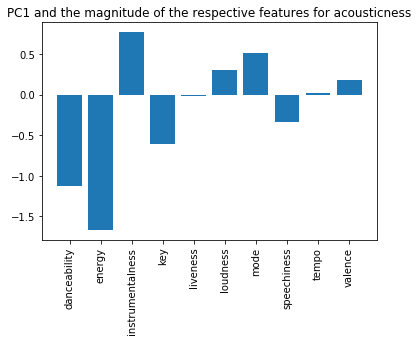

In [7]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p1 = plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for acousticness")

# Activivates a function which in the end will display all plots
interactive(True)

# Show graphic
plt.show()

In [ ]:
cnt = 0
for i in features: 
    plt.figure()
    cnt = cnt + 1
    #plt.subplot(6,2,cnt)
    plt.scatter(data[i],popdata)
    plt.xlabel(i)
    plt.ylabel('popularity')

#### 2.test: danceability vs. Acousticness, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, valence

In [8]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['acousticness', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['danceability']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [9]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [10]:
pca.explained_variance_ratio_

array([0.29598673, 0.11605212, 0.11184262, 0.10276627, 0.09485211,
       0.08484935, 0.07306319, 0.0712418 , 0.03072718, 0.01861864])

Text(0.5, 1.0, 'PC1 and the magnitude of the respective features for danceability')

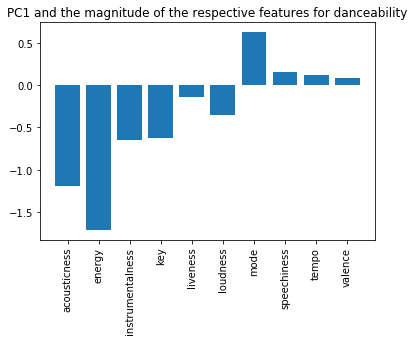

In [11]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p2=plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for danceability")
# Show graphic
plt.show()

#### 3.test: energy vs. danceability, acousticness, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, valence

In [12]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['acousticness','danceability' ,
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['energy']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [13]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [14]:
pca.explained_variance_ratio_

array([0.27501822, 0.1160913 , 0.11372728, 0.09944336, 0.09650701,
       0.0853231 , 0.07237204, 0.06651228, 0.04821985, 0.02678557])

Text(0.5, 1.0, 'PC1 and the magnitude of the respective features for energy')

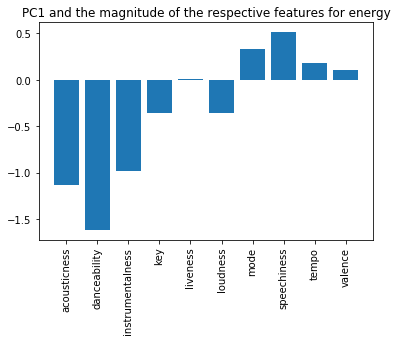

In [15]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p3 = plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for energy")
# Show graphic
plt.show()

#### 4.test:  instrumentalness vs. energy, danceability, acousticness, key, liveness, loudness, mode, speechiness, tempo, valence

In [16]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['acousticness','danceability' ,'energy', 
            'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['instrumentalness']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [17]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [18]:
pca.explained_variance_ratio_

array([0.2936539 , 0.12275846, 0.11487005, 0.1043889 , 0.09661125,
       0.08449857, 0.07131918, 0.05292696, 0.03836887, 0.02060387])

Text(0.5, 1.0, 'PC1 and the magnitude of the respective features for instrumentalness')

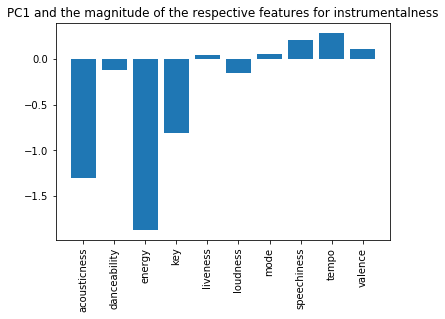

In [19]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p4 = plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for instrumentalness")
# Show graphic
plt.show()

#### 5. test: key vs.  instrumentalness, energy, danceability, acousticness, liveness, loudness, mode, speechiness, tempo, valence

In [20]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['instrumentalness','acousticness','danceability' ,'energy' 
            , 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['key']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [21]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [22]:
pca.explained_variance_ratio_

array([0.32732685, 0.12519798, 0.10520361, 0.10122022, 0.09534107,
       0.07421234, 0.07209438, 0.05186785, 0.03055968, 0.01697602])

Text(0.5, 1.0, 'PC1 and the magnitude of the respective features for key')

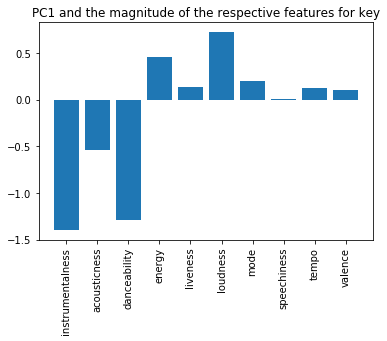

In [23]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p5 = plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for key")
# Show graphic
plt.show()

#### 6. test: liveness vs. instrumentalness, energy, danceability, acousticness, key, loudness, mode, speechiness, tempo, valence

In [24]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['instrumentalness','acousticness','danceability' ,'energy' 
            ,'key' , 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['liveness']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [25]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [26]:
pca.explained_variance_ratio_

array([0.32740216, 0.11645097, 0.11069691, 0.10170316, 0.08820819,
       0.07848815, 0.07368377, 0.05564087, 0.03054813, 0.0171777 ])

Text(0.5, 1.0, 'PC1 and the magnitude of the respective features for liveness')

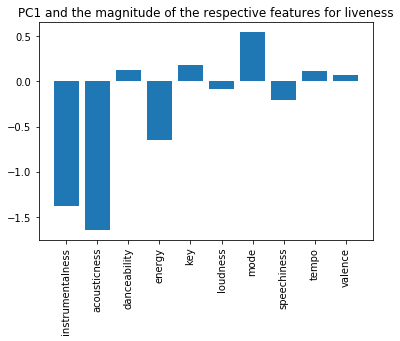

In [27]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p6 = plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for liveness")
# Show graphic
plt.show()

#### 7. test: loudness vs. instrumentalness, energy, danceability, acousticness, key, liveness, mode, speechiness, tempo, valence

In [28]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['instrumentalness','acousticness','danceability' ,'energy' 
            ,'key' ,'liveness' , 'mode',
       'speechiness', 'tempo', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['loudness']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [29]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [30]:
pca.explained_variance_ratio_

array([0.26075162, 0.12531344, 0.11511132, 0.10014916, 0.09621466,
       0.08507371, 0.07124496, 0.06988352, 0.05166624, 0.02459138])

Text(0.5, 1.0, 'PC1 and the magnitude of the respective features for loudness')

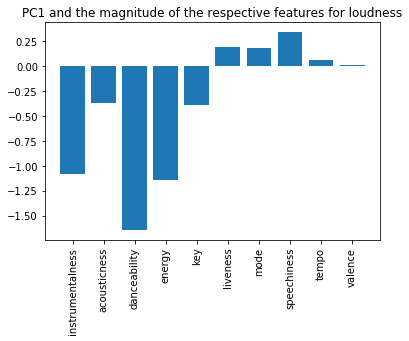

In [31]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p7 = plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for loudness")
# Show graphic
plt.show()

#### 8. test: mode vs. instrumentalness, energy, danceability, acousticness, key, liveness, loudness, speechiness, tempo, valence

In [32]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['instrumentalness','acousticness','danceability' ,'energy' 
            ,'key' ,'liveness' , 'loudness',
       'speechiness', 'tempo', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['mode']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [33]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [34]:
pca.explained_variance_ratio_

array([0.32598874, 0.12531528, 0.10501661, 0.10006762, 0.09658499,
       0.07554443, 0.07215673, 0.05177718, 0.03055194, 0.01699649])

Text(0.5, 1.0, 'PC1 and the magnitude of the respective features for mode')

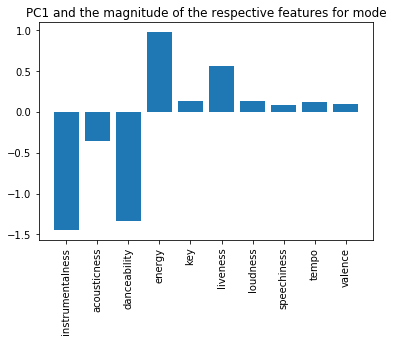

In [35]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p8 = plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for mode")
# Show graphic
plt.show()

#### 9. test: speechiness vs. instrumentalness, energy, danceability, acousticness, key, liveness, loudness, mode, tempo, valence

In [36]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['instrumentalness','acousticness','danceability' ,'energy' 
            ,'key' ,'liveness' , 'loudness',
       'mode', 'tempo', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['speechiness']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [37]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [38]:
pca.explained_variance_ratio_

array([0.32310904, 0.12520097, 0.11574187, 0.09670642, 0.08581415,
       0.07681877, 0.07379565, 0.05395706, 0.03158691, 0.01726915])

Text(0.5, 1.0, 'PC1 and the magnitude of the respective features for speechness')

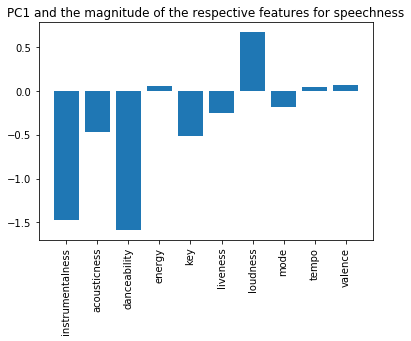

In [39]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p9 = plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for speechness")
# Show graphic
plt.show()

#### 10. test: tempo vs. instrumentalness, energy, danceability, acousticness, key, liveness, loudness, mode, speechiness, valence

In [40]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['instrumentalness','acousticness','danceability' ,'energy' 
            ,'key' ,'liveness' , 'loudness',
       'mode', 'speechiness', 'valence']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['tempo']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [41]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [42]:
pca.explained_variance_ratio_

array([0.32157535, 0.12438974, 0.11583758, 0.10373098, 0.08561299,
       0.07520027, 0.07359983, 0.05219221, 0.03082403, 0.01703701])

Text(0.5, 1.0, 'PC1 and the magnitude of the respective features for tempo')

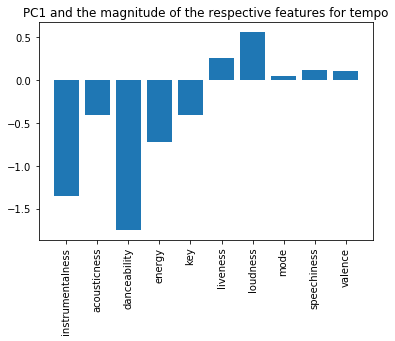

In [43]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p10 = plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for tempo")
# Show graphic
plt.show()

#### 11. test: valence vs. instrumentalness, energy, danceability, acousticness, key, liveness, loudness, mode, speechiness, tempo

In [44]:
#Standardization

from sklearn.preprocessing import StandardScaler
features = ['instrumentalness','acousticness','danceability' ,'energy' 
            ,'key' ,'liveness' , 'loudness',
       'mode', 'speechiness', 'tempo']
# Separating out the features
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['valence']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [45]:
#Projection

from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
principalComponents = pca.fit_transform(x)

In [46]:
pca.explained_variance_ratio_

array([0.30134588, 0.12030634, 0.11588089, 0.10406841, 0.09428194,
       0.08530218, 0.07265722, 0.05627641, 0.03214323, 0.01773751])

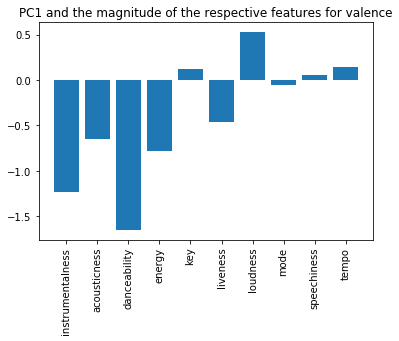

In [52]:
height = principalComponents[0]
bars = features
y_pos = np.arange(len(bars))
 
# Create bars
p11 = plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation = 90)
plt.title("PC1 and the magnitude of the respective features for valence")

# Show graphic
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler
features = ['instrumentalness','acousticness','danceability' ,'energy' 
            ,'key' ,'liveness' , 'loudness',
       'mode', 'speechiness', 'tempo']
# Separating out the features
x = data.loc[:, features[1]].values
# Separating out the target
y = data.loc[:,features[1]].values


TypeError: bad operand type for unary -: 'str'